Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


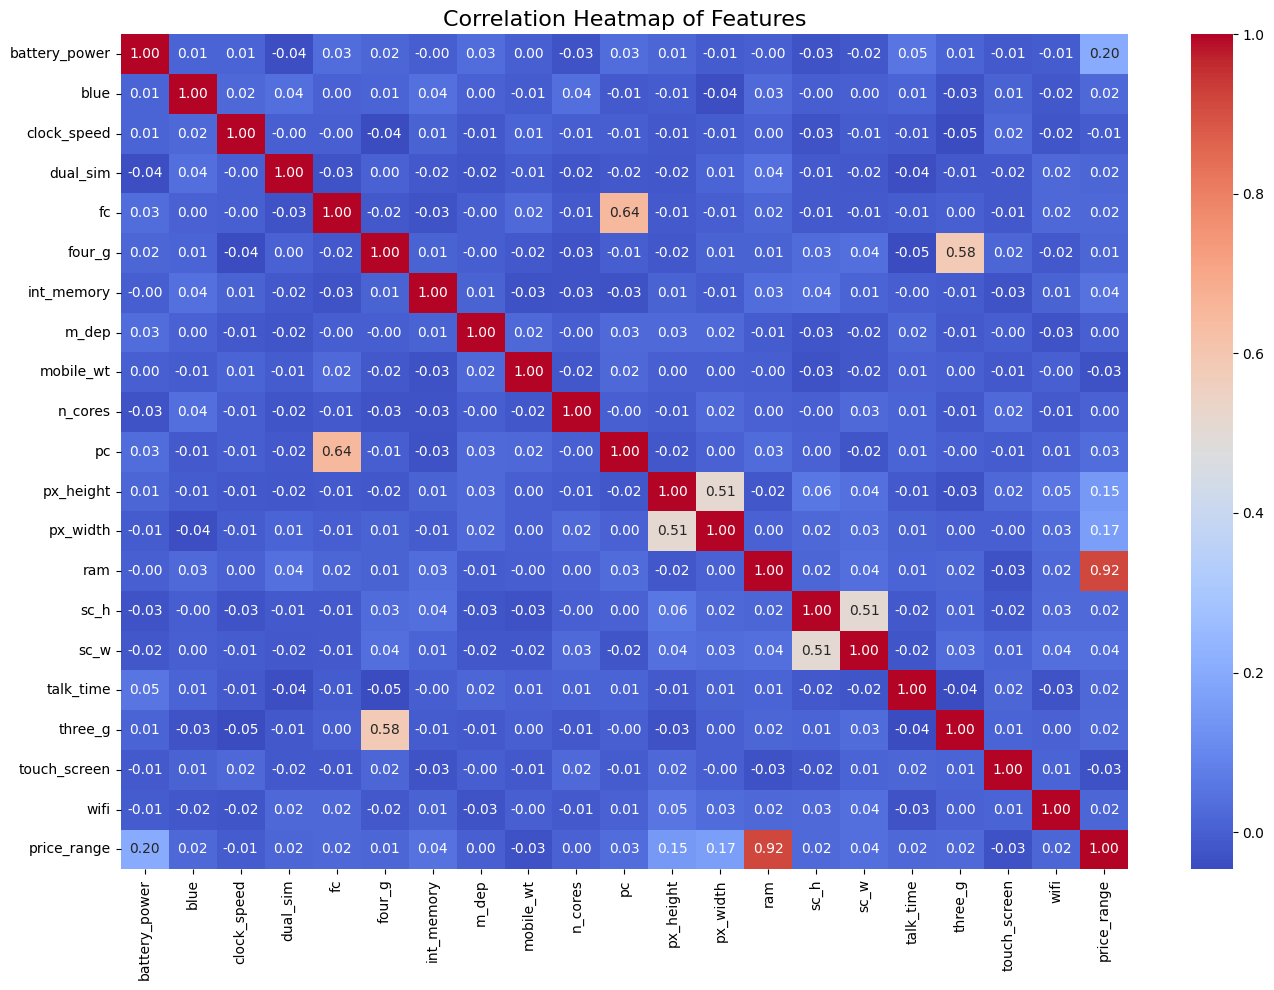

WITHOUT Feature Selection


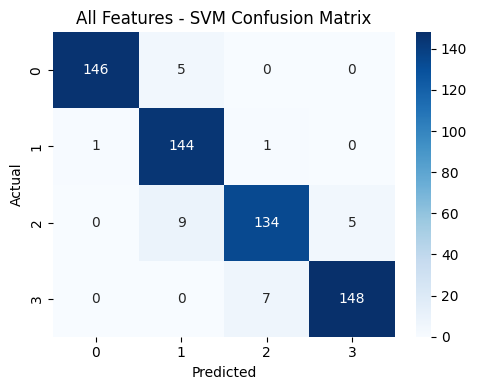

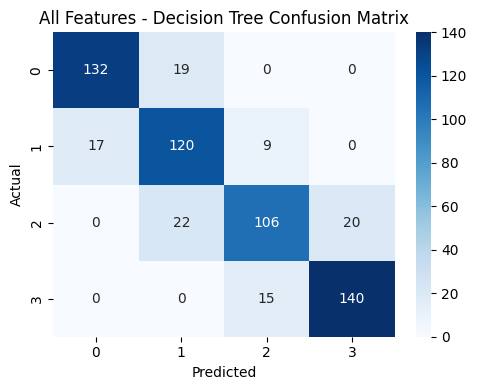

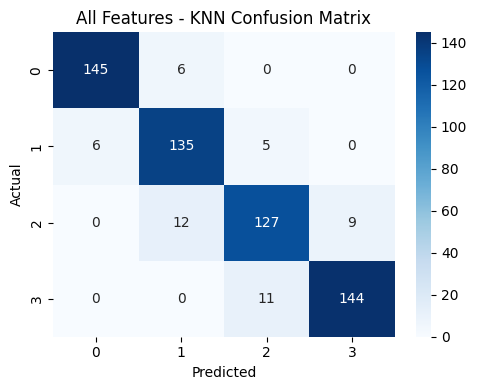

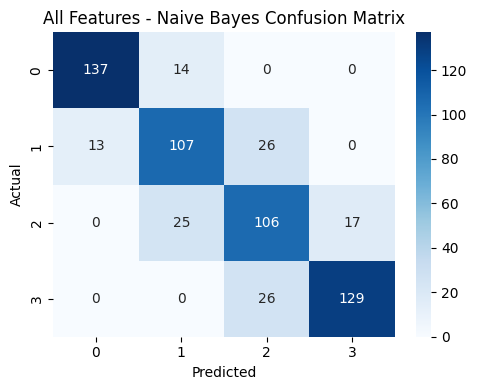

               Accuracy  Precision  Recall  F1 Score
SVM               95.33      95.44   95.33     95.33
Decision Tree     83.00      83.15   83.00     82.94
KNN               91.83      91.86   91.83     91.83
Naive Bayes       79.83      80.19   79.83     79.97

WITH Feature Selection


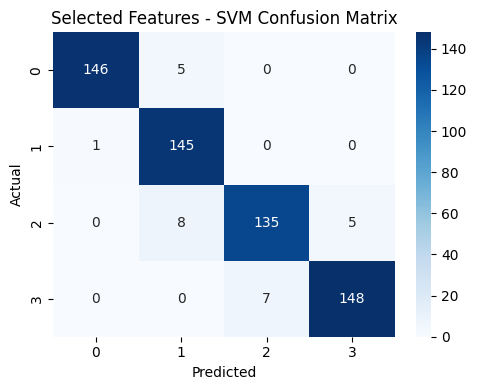

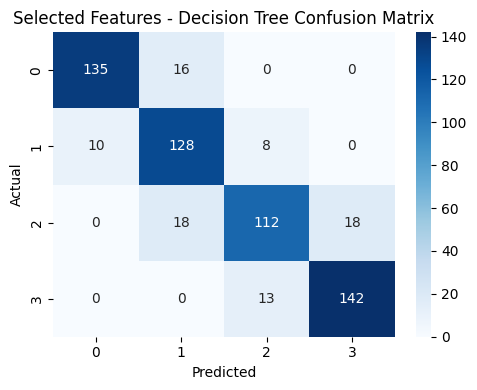

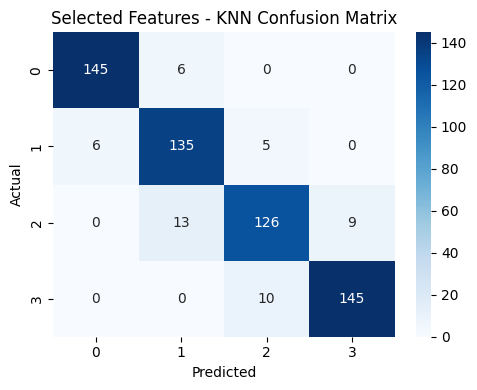

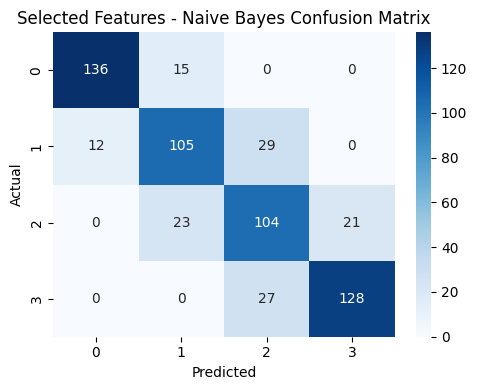

               Accuracy  Precision  Recall  F1 Score
SVM               95.67      95.77   95.67     95.67
Decision Tree     86.17      86.36   86.17     86.14
KNN               91.83      91.86   91.83     91.82
Naive Bayes       78.83      79.22   78.83     78.99


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from google.colab import drive

drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Data Mining Final/train.csv")

#Correlation Heatmap (Without Feature Selection)
plt.figure(figsize=(14, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Features', fontsize=16)
plt.tight_layout()
plt.show()

#Targeting variable and input data
y = df['price_range']
X_all = df.drop('price_range', axis=1)
X_selected = df[['ram', 'battery_power', 'px_width', 'px_height']]

#Splitting data into training and testing (70% training, 30% testing)
X_train_all, X_test_all, y_train, y_test = train_test_split(X_all, y, test_size=0.3, random_state=42)
X_train_sel, X_test_sel, _, _ = train_test_split(X_selected, y, test_size=0.3, random_state=42)

#Identifying models
models = {
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', class_weight='balanced'),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB()
}

#Model training and Confusion Matrix drawing
def evaluate_models(X_train, X_test, y_train, y_test, title_prefix=""):
    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        #Metrics
        acc = round(accuracy_score(y_test, y_pred) * 100, 2)
        prec = round(precision_score(y_test, y_pred, average='weighted') * 100, 2)
        rec = round(recall_score(y_test, y_pred, average='weighted') * 100, 2)
        f1 = round(f1_score(y_test, y_pred, average='weighted') * 100, 2)

        results[name] = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1 Score': f1}

        #Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f"{title_prefix} - {name} Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.tight_layout()
        plt.show()

    return pd.DataFrame(results).T

#Without Feature Selection
print("WITHOUT Feature Selection")
results_all = evaluate_models(X_train_all, X_test_all, y_train, y_test, title_prefix="All Features")
print(results_all)

#With Feature Selection
print("\nWITH Feature Selection")
results_selected = evaluate_models(X_train_sel, X_test_sel, y_train, y_test, title_prefix="Selected Features")
print(results_selected)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


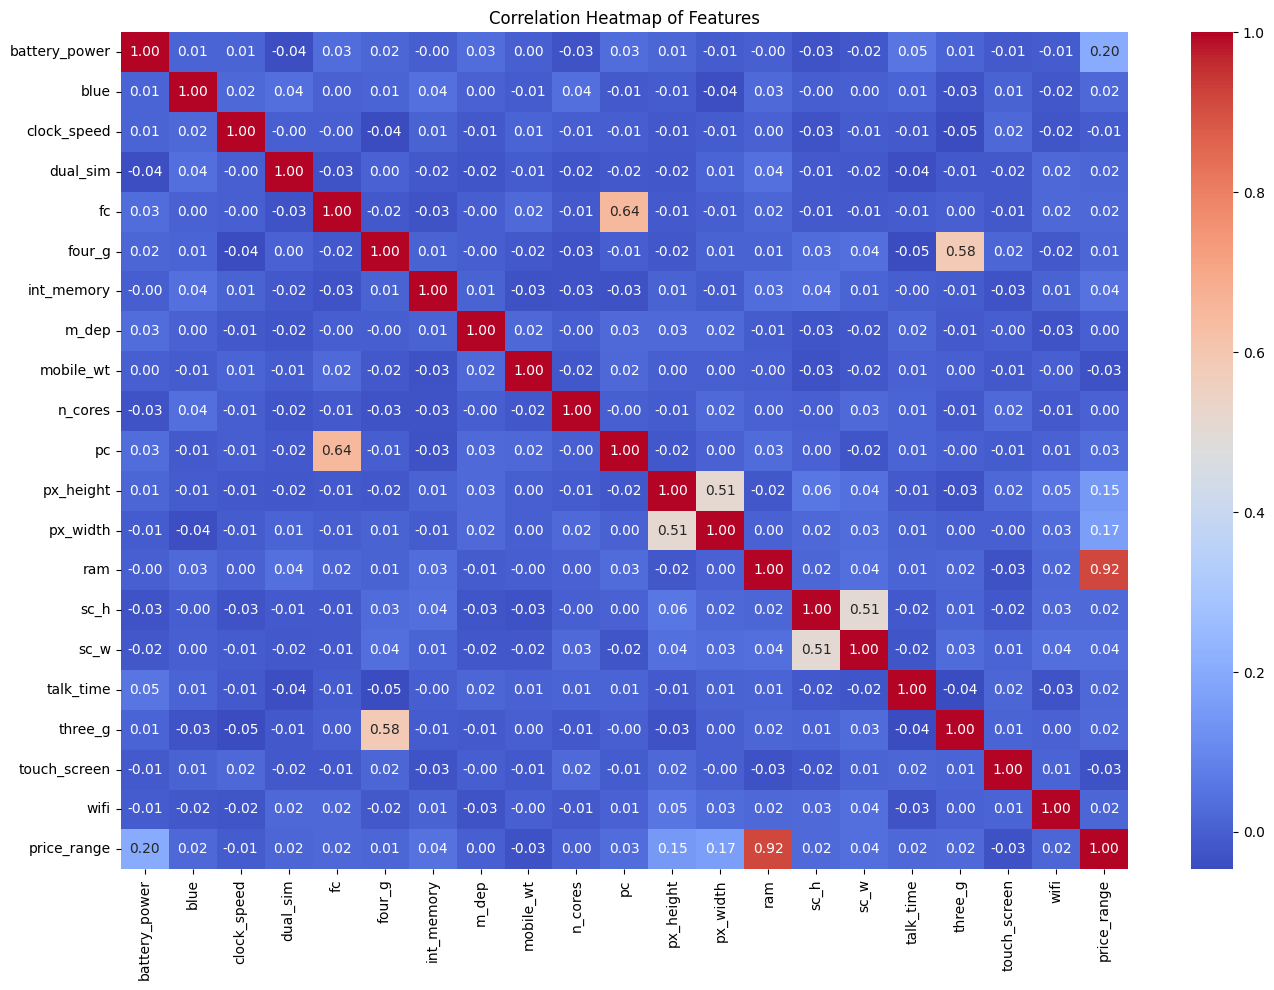

Without Feature Selection


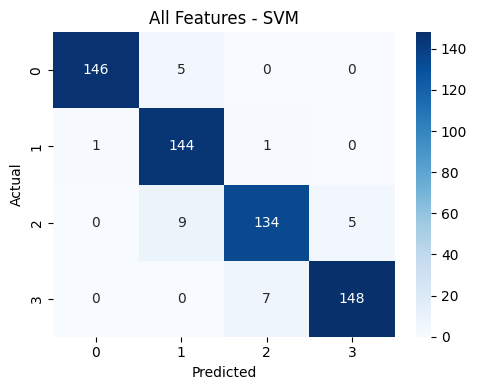

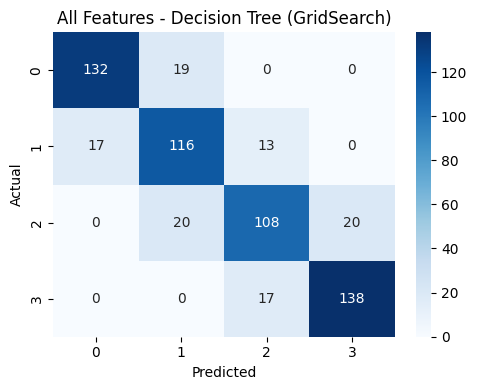

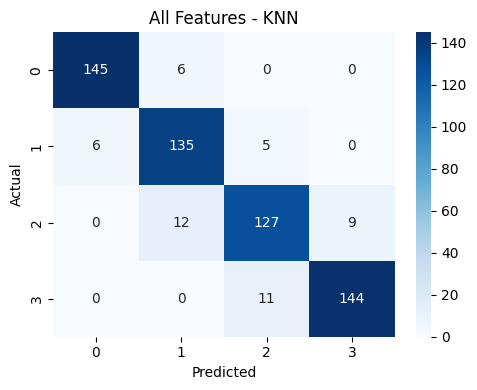

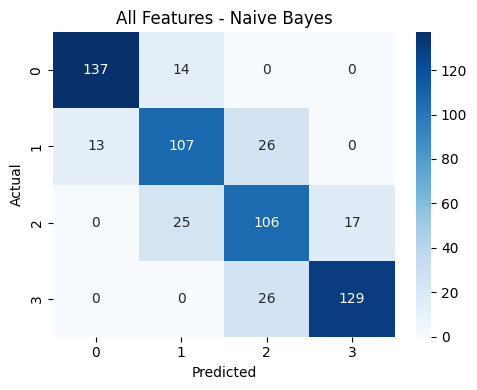

Accuracy  Precision  Recall  F1 Score
SVM                            95.33      95.44   95.33     95.33
Decision Tree (GridSearch)     82.33      82.37   82.33     82.31
KNN                            91.83      91.86   91.83     91.83
Naive Bayes                    79.83      80.19   79.83     79.97


With Feature Selection


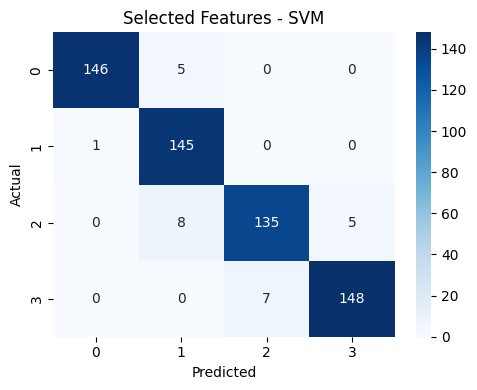

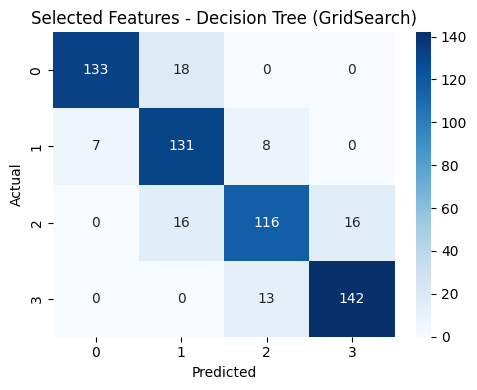

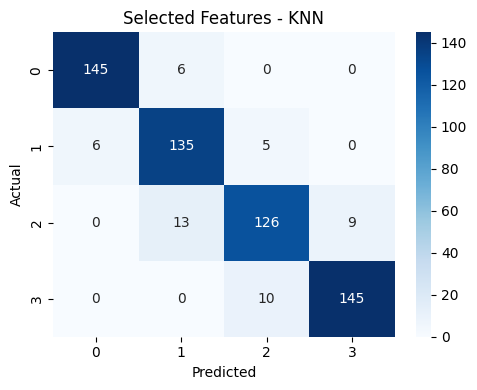

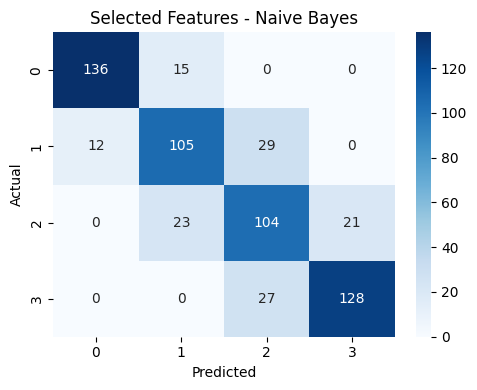

Accuracy  Precision  Recall  F1 Score
SVM                            95.67      95.77   95.67     95.67
Decision Tree (GridSearch)     87.00      87.33   87.00     87.02
KNN                            91.83      91.86   91.83     91.82
Naive Bayes                    78.83      79.22   78.83     78.99

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Data Mining Final/train.csv")

#Correlation Heatmap
plt.figure(figsize=(14, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.tight_layout()
plt.show()

#Targeting variable and input data
y = df['price_range']
X_all = df.drop('price_range', axis=1)
X_selected = df[['ram', 'battery_power', 'px_width', 'px_height']]

#Splitting into training and test data
X_train_all, X_test_all, y_train, y_test = train_test_split(X_all, y, test_size=0.3, random_state=42)
X_train_sel, X_test_sel, _, _ = train_test_split(X_selected, y, test_size=0.3, random_state=42)

#Model training, evaluation and drawing confusion matrix
def evaluate_models(X_train, X_test, y_train, y_test, title_prefix=""):
    results = {}

    #SVM
    svm = SVC()
    svm.fit(X_train, y_train)
    y_pred_svm = svm.predict(X_test)
    results['SVM'] = {
        'Accuracy': accuracy_score(y_test, y_pred_svm),
        'Precision': precision_score(y_test, y_pred_svm, average='weighted'),
        'Recall': recall_score(y_test, y_pred_svm, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred_svm, average='weighted')
    }
    plot_conf_matrix(y_test, y_pred_svm, f"{title_prefix} - SVM")

    #Decision Tree + GridSearchCV
    param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10, 15],
        'class_weight': ['balanced', None]
    }
    dt = DecisionTreeClassifier(random_state=42)
    grid_dt = GridSearchCV(dt, param_grid, cv=5, scoring='f1_weighted')
    grid_dt.fit(X_train, y_train)
    best_dt = grid_dt.best_estimator_
    y_pred_dt = best_dt.predict(X_test)
    results['Decision Tree (GridSearch)'] = {
        'Accuracy': accuracy_score(y_test, y_pred_dt),
        'Precision': precision_score(y_test, y_pred_dt, average='weighted'),
        'Recall': recall_score(y_test, y_pred_dt, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred_dt, average='weighted')
    }
    plot_conf_matrix(y_test, y_pred_dt, f"{title_prefix} - Decision Tree (GridSearch)")

    #KNN
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    results['KNN'] = {
        'Accuracy': accuracy_score(y_test, y_pred_knn),
        'Precision': precision_score(y_test, y_pred_knn, average='weighted'),
        'Recall': recall_score(y_test, y_pred_knn, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred_knn, average='weighted')
    }
    plot_conf_matrix(y_test, y_pred_knn, f"{title_prefix} - KNN")

    #Naive Bayes
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    y_pred_nb = nb.predict(X_test)
    results['Naive Bayes'] = {
        'Accuracy': accuracy_score(y_test, y_pred_nb),
        'Precision': precision_score(y_test, y_pred_nb, average='weighted'),
        'Recall': recall_score(y_test, y_pred_nb, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred_nb, average='weighted')
    }
    plot_conf_matrix(y_test, y_pred_nb, f"{title_prefix} - Naive Bayes")

    return (pd.DataFrame(results).T * 100).round(2)

#Confusion matrix
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

#Without Feature Selection
print("Without Feature Selection")
results_all = evaluate_models(X_train_all, X_test_all, y_train, y_test, title_prefix="All Features")
display(results_all)

#With Feature Selection
print("\nWith Feature Selection")
results_sel = evaluate_models(X_train_sel, X_test_sel, y_train, y_test, title_prefix="Selected Features")
display(results_sel)
